In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
data_safe=pd.read_csv('Index2018.csv')
data=data_safe.copy()
data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [44]:
data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [45]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [46]:
dat=data.iloc[:100,:]
dat

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
...,...,...,...,...,...
95,20/05/1994,454.92,2238.97,3127.28,20342.17
96,23/05/1994,453.20,2238.97,3108.40,20568.71
97,24/05/1994,454.81,2188.01,3089.10,20622.12
98,25/05/1994,456.34,2137.56,3020.70,20663.63


Text(0.5, 1.0, 'Market exit')

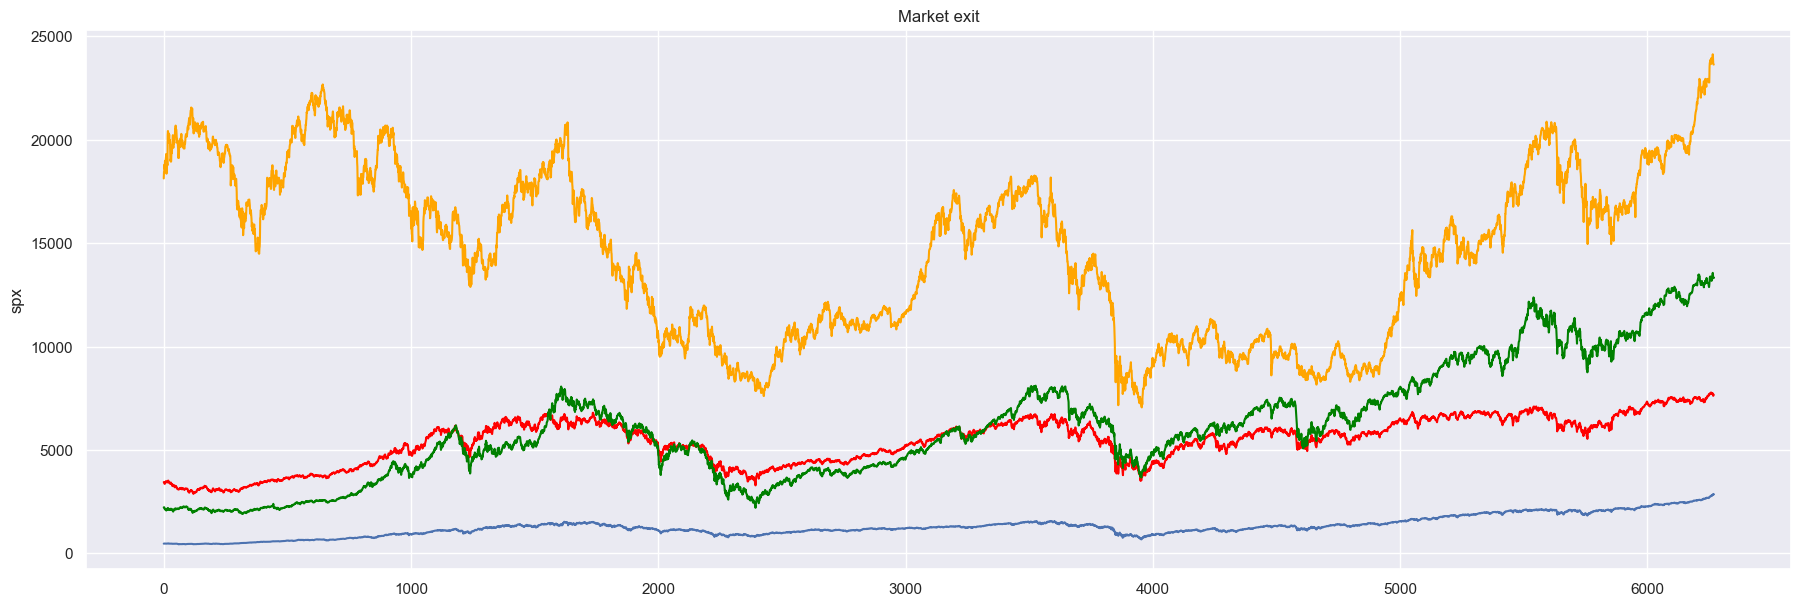

In [47]:
plt.figure(figsize=(22,7))
sns.lineplot(data.spx)
sns.lineplot(data.ftse,color='red')
sns.lineplot(data.dax,color='green')
sns.lineplot(data.nikkei,color='orange')
plt.title('Market exit')

In [48]:
data['date']=pd.to_datetime(data['date'],dayfirst=True)

In [49]:
data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [50]:
data.set_index('date',inplace=True)

In [51]:
data

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [52]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [53]:
data=data.asfreq('B')
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [54]:
data.shape

(6277, 4)

In [55]:
data['spx'].fillna(method='ffill',inplace=True)
data.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [56]:
data['ftse'].fillna(method='ffill',inplace=True)
data['nikkei'].fillna(method='bfill',inplace=True)
data['dax'].fillna(data['dax'].mean(),inplace=True)

In [57]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [58]:
data.drop(['dax','ftse','nikkei'],axis=1,inplace=True)
data

,spx
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [59]:
data.rename(columns={'spx':'new'},inplace=True)
data

,new
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [60]:
cut_train=int(len(data)*0.8)
cut_test=len(data)-cut_train
print('train_size: {}\ntest_size: {}'.format(cut_train,cut_test))

train_size: 5021
test_size: 1256


In [61]:
x_train=data.iloc[:cut_train,:]
x_test=data.iloc[cut_train:,:]

In [62]:
x_train.tail()

,new
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [63]:
x_test.head()

,new
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
